## Creating GrayScaled Images 
This script takes the downloaded cutouts and will create flat grayscaled images of the sources to be used in the Gini coefficient calculation.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.wcs import WCS

import glob
from tqdm import tqdm
import os

In [2]:
folder = 'E:/GZ-DESI/images'

In [3]:
minor_dist_files = glob.glob(f'{folder}/minor-dist/*.fits')
major_dist_files = glob.glob(f'{folder}/major-dist/*.fits')
merger_files = glob.glob(f'{folder}/mergers/*.fits')

### Testing the Pipeline

In [4]:
major_dist_files[0]

'E:/GZ-DESI/images/major-dist\\100012_421-cutout.fits'

In [5]:
header = fits.getheader(major_dist_files[0])
data = fits.getdata(major_dist_files[0])

In [6]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  256 / length of data axis 1                          
NAXIS2  =                  256 / length of data axis 2                          
NAXIS3  =                    3 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BANDS   = 'grz     '                                                            
BAND0   = 'g       '                                                            
BAND1   = 'r       '                                                            
BAND2   = 'z       '        

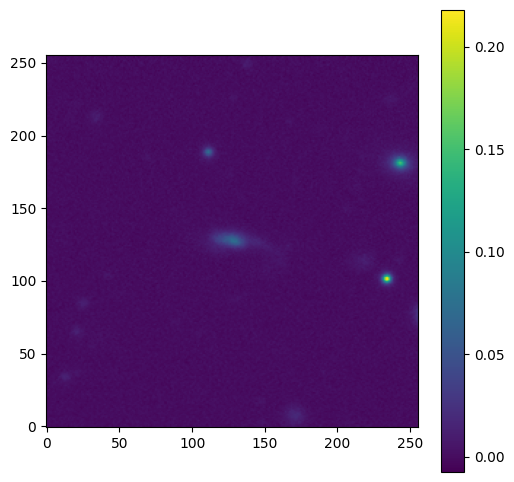

In [7]:
plt.figure(figsize = (6,6))
plt.imshow(data[0,:,:], origin = 'lower')
plt.colorbar()
plt.show()

In [8]:
flattened_data = np.sum(data, axis = 0)
averaged_data = flattened_data / 3

In [9]:
new_fits_file = fits.PrimaryHDU(averaged_data, header=header)

In [10]:
os.path.exists(f'{folder}/grayscaled-images/major-dist/')

False

In [12]:
new_fits_file.writeto(f'E:/GZ-DESI/grayscaled-images/major-dist/test.fits')

### The Actual Pipeline

minor_dist_files
major_dist_files
merger_files

In [16]:
category = 'major-dist'
gray_folder = 'E:/GZ-DESI/grayscaled-images'
for i in tqdm(major_dist_files):
    id_str = os.path.basename(i).replace('.fits','')
    filename = f'{gray_folder}/{category}/gray-{id_str}.fits'
    
    if os.path.exists(filename):
        continue
    
    header = fits.getheader(i)
    data = fits.getdata(i)
    
    flattened_data = np.sum(data, axis = 0)
    averaged_data = flattened_data / 3
    
    new_fits_file = fits.PrimaryHDU(averaged_data, header=header)
    new_fits_file.writeto(filename)
    
    del filename, new_fits_file, header, data

100%|██████████| 11594/11594 [15:44<00:00, 12.27it/s]
